<a href="https://colab.research.google.com/github/amirrezagharibi/Plastic-Production-Forecasting/blob/main/Plastic_Production_Forecast_REG_ARIMA__LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TimeSeries Analysis of World Plastic Production 


### Import Libraries

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
from sklearn.metrics import r2_score

### Evaluation Functions

In [61]:
#evaluation functions 
#MAE
def mae(t,p):
  t = np.array(t) 
  p = np.array(p)
  return abs(np.mean(t-p))
#RMSE
def rmse(t,p):
  t = np.array(t) 
  p = np.array(p)
  return np.sqrt(np.sum((p - t)**2)/len(test_y))
#MAPE
def mape(t,p):
  t = np.array(t) 
  p = np.array(p)
  return (np.sum(abs((t-p)/t)))/len(test_y)

### Import Data

In [62]:
pp= pd.read_csv("/content/global-plastics-production.csv")
pp.head()

,Entity,Code,Year,Global plastics production
0,World,OWID_WRL,1950,2000000
1,World,OWID_WRL,1951,2000000
2,World,OWID_WRL,1952,2000000
3,World,OWID_WRL,1953,3000000
4,World,OWID_WRL,1954,3000000


### preliminary analysis

In [63]:
pp.shape

(70, 4)

In [64]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Entity                      70 non-null     object
 1   Code                        70 non-null     object
 2   Year                        70 non-null     int64 
 3   Global plastics production  70 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ KB


In [65]:
pp.describe()

,Year,Global plastics production
count,70.000000,7.000000e+01
mean,1984.500000,1.363415e+08
std,20.351085,1.314798e+08
min,1950.000000,2.000000e+06
25%,1967.250000,2.400000e+07
50%,1984.500000,8.800000e+07
75%,2001.750000,2.277500e+08
max,2019.000000,4.597459e+08


In [66]:
pp1 = pp.drop(columns=['Entity' , 'Code'] , axis = 1)
pp1

,Year,Global plastics production
0,1950,2000000
1,1951,2000000
2,1952,2000000
3,1953,3000000
4,1954,3000000
...,...,...
65,2015,381000000
66,2016,400050000
67,2017,420052500
68,2018,441055125


In [67]:
pp1.index = pp1['Year']
pp1

,Year,Global plastics production
Year,,
1950,1950,2000000
1951,1951,2000000
1952,1952,2000000
1953,1953,3000000
1954,1954,3000000
...,...,...
2015,2015,381000000
2016,2016,400050000
2017,2017,420052500


In [68]:
pp1['Time'] = range(pp1.shape[0])
pp1

,Year,Global plastics production,Time
Year,,,
1950,1950,2000000,0
1951,1951,2000000,1
1952,1952,2000000,2
1953,1953,3000000,3
1954,1954,3000000,4
...,...,...,...
2015,2015,381000000,65
2016,2016,400050000,66
2017,2017,420052500,67


In [69]:
pp1 = pp1.drop(columns ='Year' , axis= 1  )

In [70]:
pp1.head()

,Global plastics production,Time
Year,,
1950,2000000,0
1951,2000000,1
1952,2000000,2
1953,3000000,3
1954,3000000,4


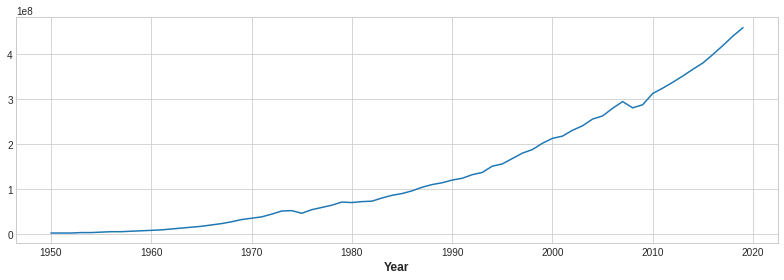

In [71]:
pp1.iloc[: , 0].plot()

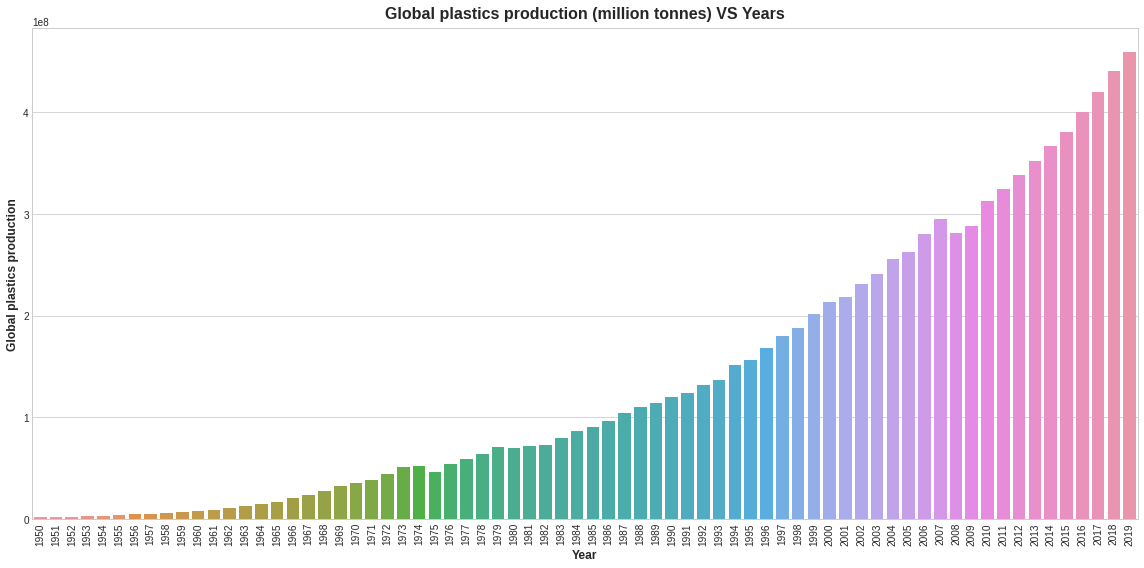

In [72]:
plt.figure(figsize=(16,8))
sns.barplot(x=pp1.index,y=pp1['Global plastics production'])
plt.title("Global plastics production (million tonnes) VS Years")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Time Plot of Global plastics production')

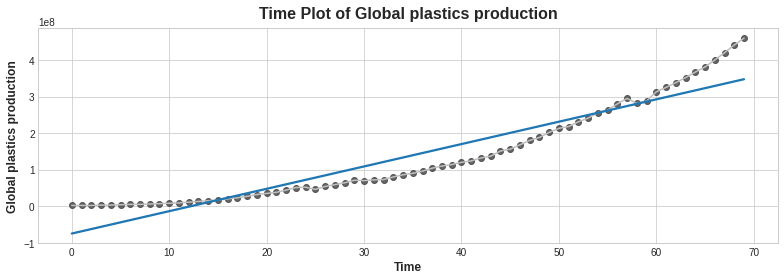

In [73]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
#%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Global plastics production', data=pp1, color='0.75')
ax = sns.regplot(x='Time', y='Global plastics production', data=pp1, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Global plastics production')

In [74]:
pp1

,Global plastics production,Time
Year,,
1950,2000000,0
1951,2000000,1
1952,2000000,2
1953,3000000,3
1954,3000000,4
...,...,...
2015,381000000,65
2016,400050000,66
2017,420052500,67


### Test and Train Split

In [75]:
pp_x = pp1.iloc[: , 1:] #features 
pp_y = pp1.iloc[: , 0]  #target

train_x = pp_x.loc[:2010 ,:]
test_x = pp_x.loc[2010: ,:]

train_y = pp_y.loc[:2010 ,]
test_y = pp_y.loc[2010: ,]

In [76]:
train_x

,Time
Year,
1950,0
1951,1
1952,2
1953,3
1954,4
...,...
2006,56
2007,57
2008,58


### linear regression


In [77]:
from sklearn.preprocessing import PolynomialFeatures
lreg_ftr = PolynomialFeatures(1)
lreg_ftr = lreg_ftr.fit_transform(train_x)
lreg_fte = PolynomialFeatures(1)
lreg_fte = lreg_fte.fit_transform(test_x)

reg_model = LinearRegression()
reg_model.fit(X = lreg_ftr  , y =  train_y)

y_pred_lreg = pd.Series(reg_model.predict(lreg_fte) ,index = test_y.index)
y_pred_lreg


Year
2010    2.498519e+08
2011    2.548689e+08
2012    2.598858e+08
2013    2.649027e+08
2014    2.699196e+08
2015    2.749365e+08
2016    2.799535e+08
2017    2.849704e+08
2018    2.899873e+08
2019    2.950042e+08
dtype: float64

In [78]:
from sklearn.preprocessing import PolynomialFeatures

reg_model = LinearRegression()
reg_model.fit(X = train_x , y =  np.array(train_y))

y_pred_lreg = pd.Series(reg_model.predict(test_x) ,index = test_y.index)
y_pred_lreg


Year
2010    2.498519e+08
2011    2.548689e+08
2012    2.598858e+08
2013    2.649027e+08
2014    2.699196e+08
2015    2.749365e+08
2016    2.799535e+08
2017    2.849704e+08
2018    2.899873e+08
2019    2.950042e+08
dtype: float64

In [79]:
print(reg_model.intercept_)
print(reg_model.coef_)

-51163405.605499715
[5016922.26335272]


In [80]:
x = list(range(70))
y = []

In [81]:
for i in x :
    y.append(5016922.26335272 * i + -51163405.605499715)

In [82]:
y

[-51163405.605499715,
 -46146483.34214699,
 -41129561.07879427,
 -36112638.81544156,
 -31095716.552088834,
 -26078794.288736112,
 -21061872.025383394,
 -16044949.762030676,
 -11028027.498677954,
 -6011105.235325232,
 -994182.9719725102,
 4022739.2913802043,
 9039661.554732926,
 14056583.818085648,
 19073506.081438363,
 24090428.344791085,
 29107350.608143806,
 34124272.87149653,
 39141195.13484925,
 44158117.39820197,
 49175039.661554694,
 54191961.9249074,
 59208884.18826012,
 64225806.451612845,
 69242728.71496557,
 74259650.97831829,
 79276573.24167101,
 84293495.50502372,
 89310417.76837644,
 94327340.03172916,
 99344262.29508188,
 104361184.5584346,
 109378106.82178733,
 114395029.08514005,
 119411951.34849277,
 124428873.6118455,
 129445795.87519822,
 134462718.13855094,
 139479640.40190366,
 144496562.66525638,
 149513484.9286091,
 154530407.1919618,
 159547329.45531452,
 164564251.71866724,
 169581173.98201996,
 174598096.24537268,
 179615018.5087254,
 184631940.77207813,
 1896

In [83]:
z = pd.DataFrame(y,x)
z

,0
0,-5.116341e+07
1,-4.614648e+07
2,-4.112956e+07
3,-3.611264e+07
4,-3.109572e+07
...,...
65,2.749365e+08
66,2.799535e+08
67,2.849704e+08
68,2.899873e+08


27.616220950720344

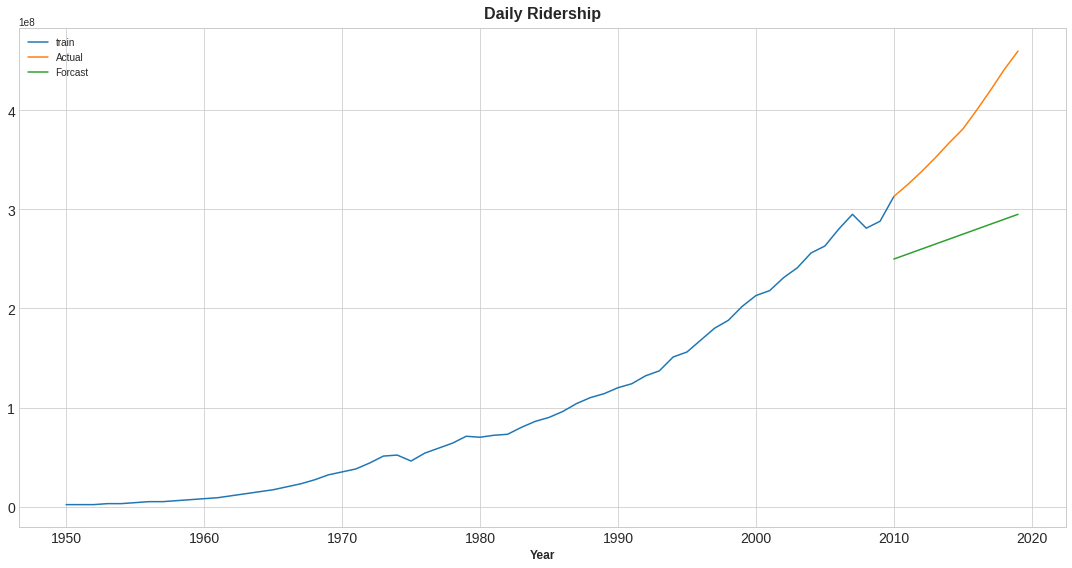

In [84]:
train_y.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
test_y.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='Actual')
y_pred_lreg.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='Forcast')
plt.legend()

mape(test_y , y_pred_lreg)*100


In [85]:
from sklearn.metrics import r2_score
r2_score(test_y ,y_pred_lreg )

-4.639553866320897

In [86]:
#from google.colab import drive

#y_pred_lreg.to_csv('/content/drive/My Drive/linear_regression_results.csv', encoding='utf-8', index=False)

### Polynomial Regression(2)

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly_ftr = PolynomialFeatures(2)
poly_ftr = poly_ftr.fit_transform(train_x)
poly_fte = PolynomialFeatures(2)
poly_fte = poly_fte.fit_transform(test_x)

reg_model = LinearRegression()
reg_model.fit(X = poly_ftr , y =  np.array(train_y))

y_pred = pd.Series(reg_model.predict(poly_fte) ,index = test_y.index)
y_pred

Year
2010    3.092294e+08
2011    3.203854e+08
2012    3.317426e+08
2013    3.433011e+08
2014    3.550609e+08
2015    3.670220e+08
2016    3.791843e+08
2017    3.915480e+08
2018    4.041129e+08
2019    4.168791e+08
dtype: float64

In [89]:
forc = pd.DataFrame(data = range(60,100) , index = range(2010 , 2050) , columns = ['Time'])
poly_forc = PolynomialFeatures(2)
poly_forc = poly_forc.fit_transform(forc)

y_pred_forc = pd.Series(reg_model.predict(poly_forc) ,index = forc.index)

4.357063435110916

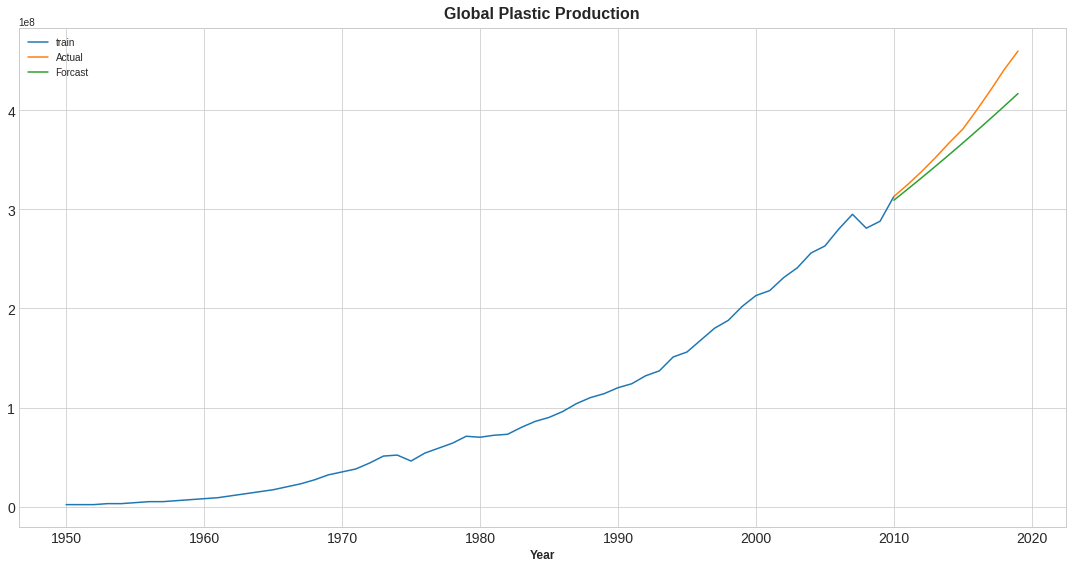

In [90]:
train_y.plot(figsize=(15,8), title= 'Global Plastic Production', fontsize=14, label='train') 
test_y.plot(figsize=(15,8), title= 'Global Plastic Production', fontsize=14, label='Actual')
y_pred.plot(figsize=(15,8), title= 'Global Plastic Production', fontsize=14, label='Forcast')
plt.legend()

mape(test_y , y_pred) * 100

In [91]:
#drive.mount('drive')

#y_pred.to_csv('/content/drive/My Drive/polynomial2_regression_results.csv', encoding='utf-8', index=False)

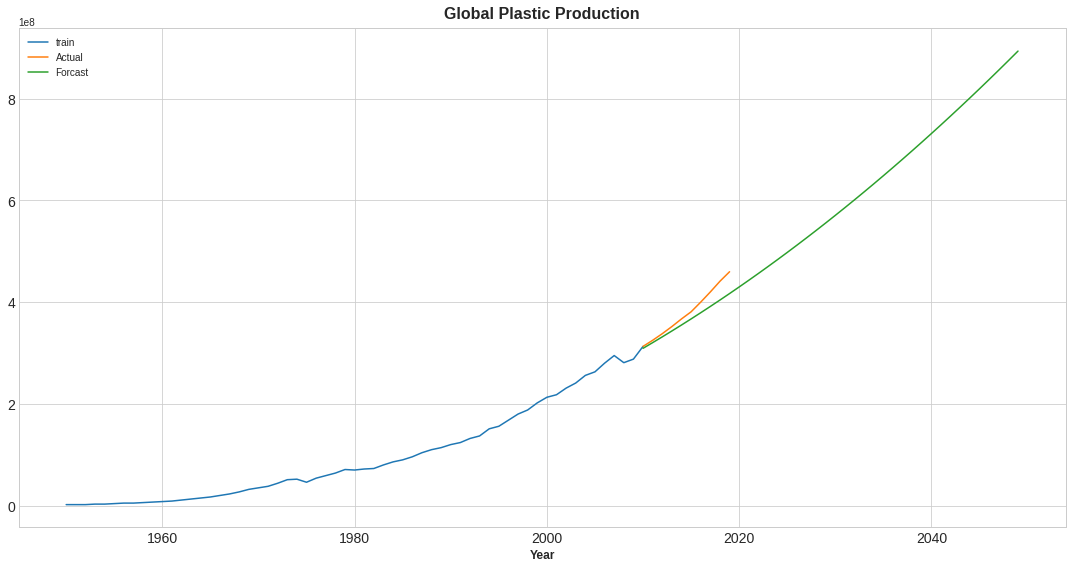

In [92]:
train_y.plot(figsize=(15,8), title= 'Global Plastic Production', fontsize=14, label='train') 
test_y.plot(figsize=(15,8), title= 'Global Plastic Production', fontsize=14, label='Actual')
y_pred_forc.plot(figsize=(15,8), title= 'Global Plastic Production', fontsize=14, label='Forcast')
plt.legend()

In [93]:
mape(test_y ,y_pred)*100

4.357063435110916

### PolynomialRegression(4)

In [94]:
poly_ftr1 = PolynomialFeatures(4)
poly_ftr1 = poly_ftr1.fit_transform(train_x)
poly_ftr1

poly_fte1 = PolynomialFeatures(4)
poly_fte1 = poly_fte1.fit_transform(test_x)

poly_reg1 = LinearRegression()
poly_reg1.fit(X = poly_ftr1 ,y= np.array(train_y))


y2_pred1 = pd.Series(poly_reg1.predict(poly_fte1)  , index = test_y.index)
y2_pred1

Year
2010    3.172680e+08
2011    3.300267e+08
2012    3.430971e+08
2013    3.564804e+08
2014    3.701779e+08
2015    3.841906e+08
2016    3.985196e+08
2017    4.131657e+08
2018    4.281296e+08
2019    4.434119e+08
dtype: float64

1.5899902414460383

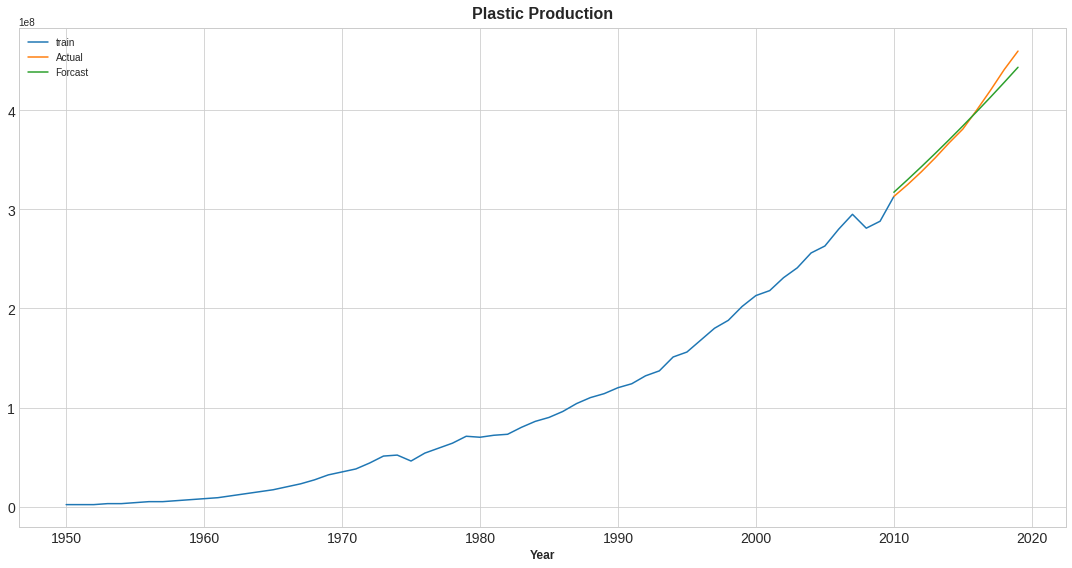

In [95]:
train_y.plot(figsize=(15,8), title= 'Plastic Production', fontsize=14, label='train') 
test_y.plot(figsize=(15,8), title= 'Plastic Production', fontsize=14, label='Actual')
y2_pred1.plot(figsize=(15,8), title= 'Plastic Production', fontsize=14, label='Forcast')
plt.legend()

mape(test_y , y2_pred1)*100

In [96]:
#drive.mount('drive')

#y2_pred1.to_csv('/content/drive/My Drive/polynomial4_regression_results.csv', encoding='utf-8', index=False)

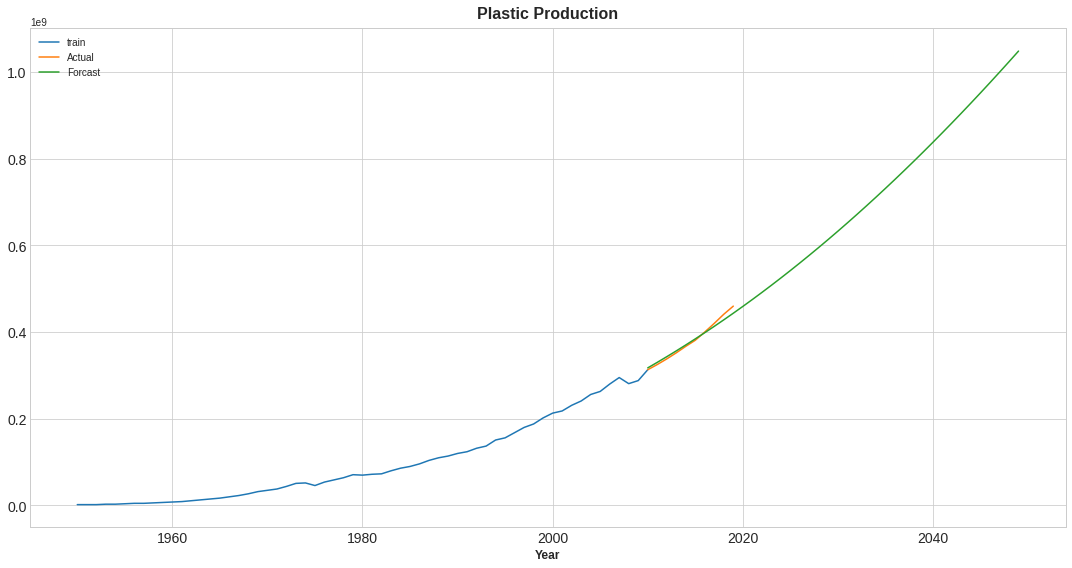

In [97]:
poly_fte_forc4 = PolynomialFeatures(4)
poly_fte_forc4 = poly_fte_forc4.fit_transform(forc)

y2_pred_forc4 = pd.Series(poly_reg1.predict(poly_fte_forc4)  , index = forc.index)
y2_pred_forc4

train_y.plot(figsize=(15,8), title= 'Plastic Production', fontsize=14, label='train') 
test_y.plot(figsize=(15,8), title= 'Plastic Production', fontsize=14, label='Actual')
y2_pred_forc4.plot(figsize=(15,8), title= 'Plastic Production', fontsize=14, label='Forcast')
plt.legend()


In [98]:
mape(test_y ,y2_pred1 )

0.015899902414460383

In [99]:
mape(test_y ,y2_pred1 )

0.015899902414460383

### ARIMA(1,2,1)

In [100]:
pp_ts = pd.DataFrame(pp1.iloc[: ,0] , columns = ['Global plastics production'])
pp_ts

,Global plastics production
Year,
1950,2000000
1951,2000000
1952,2000000
1953,3000000
1954,3000000
...,...
2015,381000000
2016,400050000
2017,420052500


In [101]:
pp_ts_train = pp_ts.loc[:2010,:] 
pp_ts_train

,Global plastics production
Year,
1950,2000000
1951,2000000
1952,2000000
1953,3000000
1954,3000000
...,...
2006,280000000
2007,295000000
2008,281000000


In [102]:
pp_ts_train.columns = ['Global plastics production(tons)']

In [103]:
pp_ts_test = pp_ts.loc[2010: ,: ]
pp_ts_test

,Global plastics production
Year,
2010,313000000
2011,325000000
2012,338000000
2013,352000000
2014,367000000
2015,381000000
2016,400050000
2017,420052500
2018,441055125


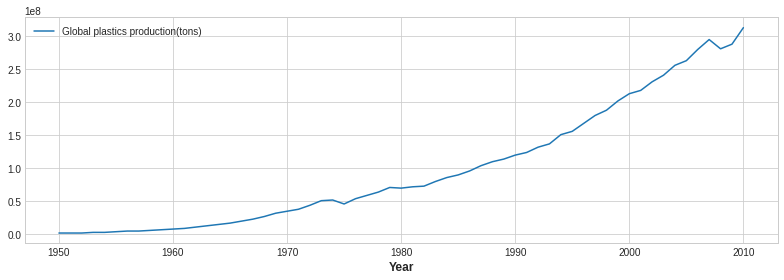

In [104]:
pp_ts_train.plot()

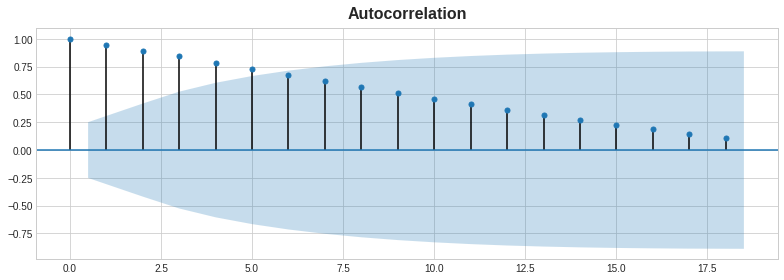

In [105]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
#plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':50})
original_acf = plot_acf(pp_ts_train)
#plt.savefig('/content/fig1' , dpi = 2000 )



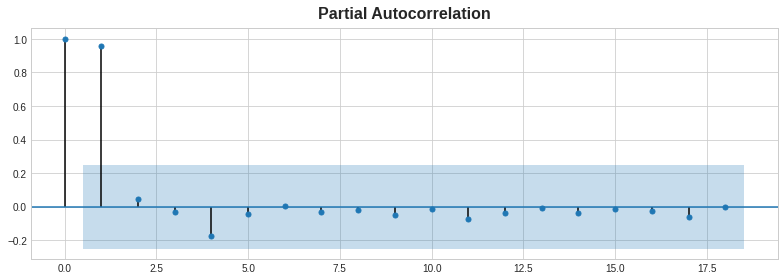

In [106]:
original_pacf  = plot_pacf(pp_ts_train)
#plt.savefig('/content/fig2' , dpi = 5000 )

In [107]:
pp_ts_train_diff1 = pp_ts_train.diff().dropna()
pp_ts_train_diff1

,Global plastics production(tons)
Year,
1951,0.0
1952,0.0
1953,1000000.0
1954,0.0
1955,1000000.0
1956,1000000.0
1957,0.0
1958,1000000.0
1959,1000000.0


In [108]:
#pp_ts_train_diff1.plot()
#plt.savefig('/content/fig2' , dpi = 5000 )

In [109]:
#plt.savefig('/content/fig2' , dpi = 5000 )

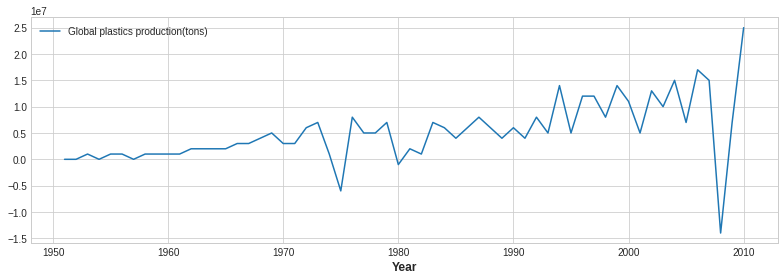

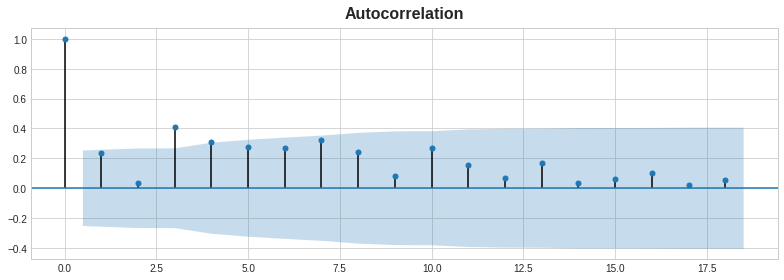

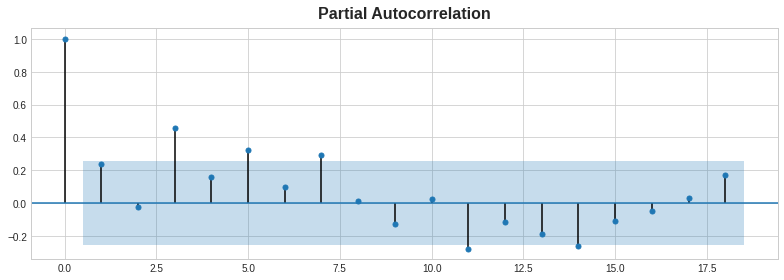

In [110]:
pp_ts_train_diff1.plot()
diff1_acf = plot_acf(pp_ts_train_diff1)
diff1_pacf  = plot_pacf(pp_ts_train_diff1)

In [111]:
from statsmodels.tsa.stattools import adfuller
adf_1 = adfuller(pp_ts_train_diff1)
print('P_value:',round(adf_1[1] , 3))

P_value: 0.78


In [112]:
pp_ts_train_diff2 = pp_ts_train_diff1.diff().dropna()
pp_ts_train_diff2

,Global plastics production(tons)
Year,
1952,0.0
1953,1000000.0
1954,-1000000.0
1955,1000000.0
1956,0.0
1957,-1000000.0
1958,1000000.0
1959,0.0
1960,0.0


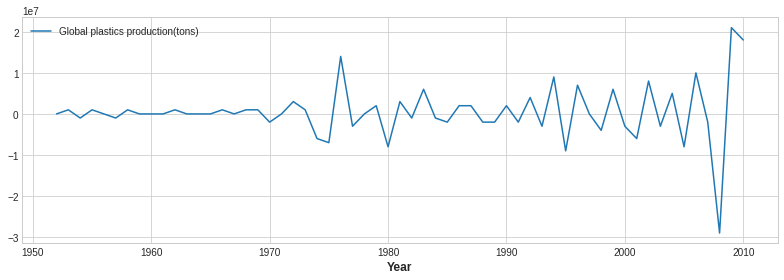

In [113]:
pp_ts_train_diff2.plot()

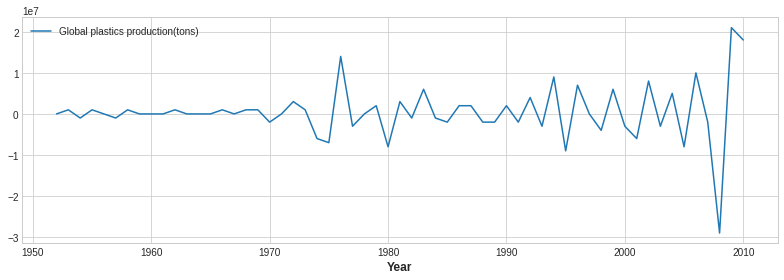

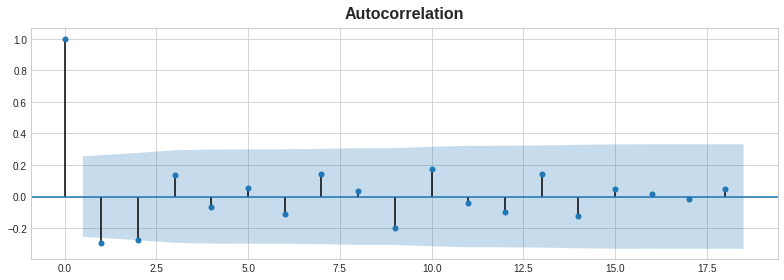

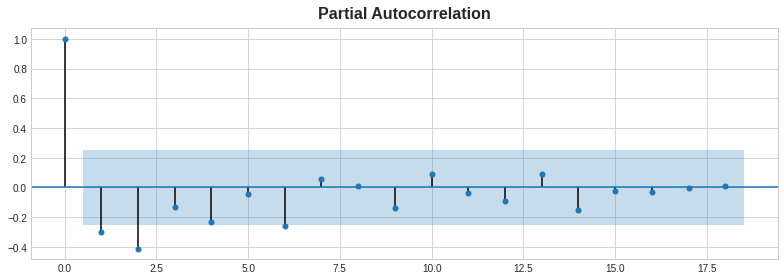

In [114]:
pp_ts_train_diff2.plot()
diff2_acf = plot_acf(pp_ts_train_diff2)
diff2_pacf  = plot_pacf(pp_ts_train_diff2)

In [115]:
adf_2 = adfuller(pp_ts_train_diff2)
print('P_value:',round(adf_2[1] , 3))

P_value: 0.0


In [116]:
pp_ts_train

,Global plastics production(tons)
Year,
1950,2000000
1951,2000000
1952,2000000
1953,3000000
1954,3000000
...,...
2006,280000000
2007,295000000
2008,281000000


In [117]:
pp_ts_test

,Global plastics production
Year,
2010,313000000
2011,325000000
2012,338000000
2013,352000000
2014,367000000
2015,381000000
2016,400050000
2017,420052500
2018,441055125


In [118]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(pp_ts_train, order=(1,2,1))
model_fit = model.fit(transparams=True)
print(model_fit.summary())



                                      ARIMA Model Results                                      
Dep. Variable:     D2.Global plastics production(tons)   No. Observations:                   59
Model:                                  ARIMA(1, 2, 1)   Log Likelihood                -996.879
Method:                                        css-mle   S.D. of innovations        5214421.863
Date:                                 Sun, 08 Jan 2023   AIC                           2001.758
Time:                                         13:20:05   BIC                           2010.069
Sample:                                              2   HQIC                          2005.002
                                                                                               
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const       

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

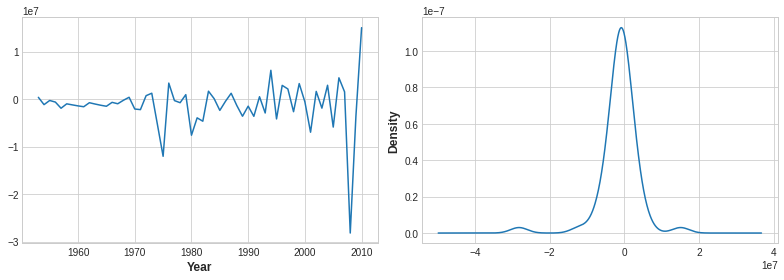

In [119]:
residuals = model_fit.resid[1:]
fig , ax = plt.subplots(1,2)
residuals.plot(ax = ax[0])
residuals.plot( kind = 'kde' , ax = ax[1])
plt.show()

In [120]:
forcast_test = model_fit.forecast(len(pp_ts_test))
forcast_test = list(forcast_test[0])
forcast_test =pd.DataFrame(forcast_test , index = pp_ts_test.index , columns = ['Global plastics production'])


In [121]:
forcast_test1 = model_fit.forecast(41)                                 
forcast_test1 = list(forcast_test1[0])
forcast_test1 =pd.DataFrame(forcast_test1 , index = range(2010 , 2051) , columns = ['Global plastics production'])


In [122]:
forcast_test1

,Global plastics production
2010,3.255075e+08
2011,3.387209e+08
2012,3.523519e+08
2013,3.664066e+08
2014,3.808852e+08
2015,3.957874e+08
2016,4.111134e+08
2017,4.268631e+08
2018,4.430366e+08
2019,4.596337e+08


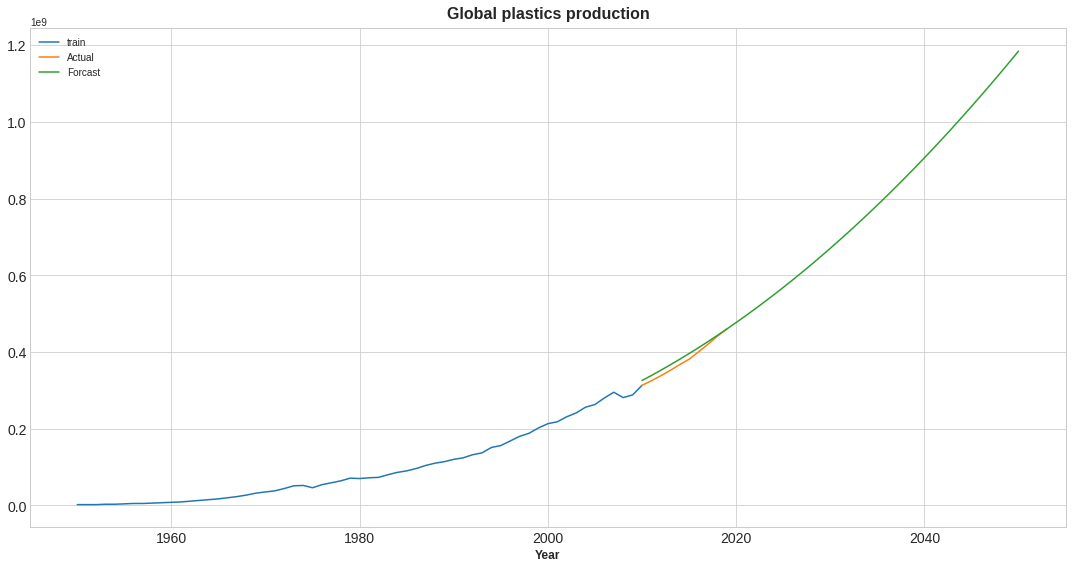

In [123]:
pd.Series(pp_ts_train['Global plastics production(tons)'] , index =pp_ts_train.index).plot(figsize=(15,8), title= 'Global plastics production', fontsize=14, label='train') 
pd.Series(pp_ts_test['Global plastics production'] ,index =  pp_ts_test.index).plot(figsize=(15,8), title= 'Global plastics production', fontsize=14, label='Actual')
#pd.Series(forcast_test['Global plastics production'] , index = forcast_test.index).plot(figsize=(15,8), title= 'Global plastics production', fontsize=14, label='Forcast')
pd.Series(forcast_test1['Global plastics production'] , index = forcast_test1.index).plot(figsize=(15,8), title= 'Global plastics production', fontsize=14, label='Forcast')
plt.legend()

In [124]:
#drive.mount('drive')

#forcast_test.to_csv('/content/drive/My Drive/arima(1,2,1)_results.csv', encoding='utf-8', index=False)

In [125]:
round(r2_score(pp_ts_test , forcast_test),2)

0.94

In [126]:
mape(pp_ts_test ,forcast_test)*100

2.908191133589075

In [127]:
#evaluation functions 
#MAE
def mae(t,p):
  return abs(np.mean(t-p))
#RMSE
def rmse(t,p):
  return np.sqrt(np.sum((p - t)**2)/len(t))
#MAPE
def mape(t,p):
  return (np.sum(abs((t-p)/t)))/len(t)

In [128]:
mape(pp_ts_test ,forcast_test)

Global plastics production    0.029082
dtype: float64

# LSTM

In [129]:
# univariate lstm
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [130]:
pp1

,Global plastics production,Time
Year,,
1950,2000000,0
1951,2000000,1
1952,2000000,2
1953,3000000,3
1954,3000000,4
...,...,...
2015,381000000,65
2016,400050000,66
2017,420052500,67


In [131]:
ts_data = list(pp1.loc[:2009 , 'Global plastics production'])
len(ts_data)

60

In [132]:
ts_data

[2000000,
 2000000,
 2000000,
 3000000,
 3000000,
 4000000,
 5000000,
 5000000,
 6000000,
 7000000,
 8000000,
 9000000,
 11000000,
 13000000,
 15000000,
 17000000,
 20000000,
 23000000,
 27000000,
 32000000,
 35000000,
 38000000,
 44000000,
 51000000,
 52000000,
 46000000,
 54000000,
 59000000,
 64000000,
 71000000,
 70000000,
 72000000,
 73000000,
 80000000,
 86000000,
 90000000,
 96000000,
 104000000,
 110000000,
 114000000,
 120000000,
 124000000,
 132000000,
 137000000,
 151000000,
 156000000,
 168000000,
 180000000,
 188000000,
 202000000,
 213000000,
 218000000,
 231000000,
 241000000,
 256000000,
 263000000,
 280000000,
 295000000,
 281000000,
 288000000]

In [133]:
ts_data1 = list(pp1.loc[2010:2019 , 'Global plastics production'])
len(ts_data1)

10

In [134]:
ts_data1

[313000000,
 325000000,
 338000000,
 352000000,
 367000000,
 381000000,
 400050000,
 420052500,
 441055125,
 459745870]

In [135]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [136]:
# define input sequence
timeseries_data = ts_data
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [137]:
print(X),print(y)

[[  2000000   2000000   2000000]
 [  2000000   2000000   3000000]
 [  2000000   3000000   3000000]
 [  3000000   3000000   4000000]
 [  3000000   4000000   5000000]
 [  4000000   5000000   5000000]
 [  5000000   5000000   6000000]
 [  5000000   6000000   7000000]
 [  6000000   7000000   8000000]
 [  7000000   8000000   9000000]
 [  8000000   9000000  11000000]
 [  9000000  11000000  13000000]
 [ 11000000  13000000  15000000]
 [ 13000000  15000000  17000000]
 [ 15000000  17000000  20000000]
 [ 17000000  20000000  23000000]
 [ 20000000  23000000  27000000]
 [ 23000000  27000000  32000000]
 [ 27000000  32000000  35000000]
 [ 32000000  35000000  38000000]
 [ 35000000  38000000  44000000]
 [ 38000000  44000000  51000000]
 [ 44000000  51000000  52000000]
 [ 51000000  52000000  46000000]
 [ 52000000  46000000  54000000]
 [ 46000000  54000000  59000000]
 [ 54000000  59000000  64000000]
 [ 59000000  64000000  71000000]
 [ 64000000  71000000  70000000]
 [ 71000000  70000000  72000000]
 [ 7000000

(None, None)

In [138]:
X.shape

(57, 3)

In [139]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [140]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
2/2 [==============================] - 3s 10ms/step - loss: 17131285587689472.0000
Epoch 2/300
2/2 [==============================] - 0s 9ms/step - loss: 17028349180248064.0000
Epoch 3/300
2/2 [==============================] - 0s 10ms/step - loss: 16910632716599296.0000
Epoch 4/300
2/2 [==============================] - 0s 13ms/step - loss: 16859365839470592.0000
Epoch 5/300
2/2 [==============================] - 0s 10ms/step - loss: 16759469195132928.0000
Epoch 6/300
2/2 [==============================] - 0s 9ms/step - loss: 17330451811139584.0000
Epoch 7/300
2/2 [==============================] - 0s 8ms/step - loss: 17059857060331520.0000
Epoch 8/300
2/2 [==============================] - 0s 11ms/step - loss: 16772139348656128.0000
Epoch 9/300
2/2 [==============================] - 0s 9ms/step - loss: 16328941673381888.0000
Epoch 10/300
2/2 [==============================] - 0s 10ms/step - loss: 15678386198282240.0000
Epoch 11/300
2/2 [==============================] - 0

In [141]:
#Forecasting next 31 years
x_input = np.array([420052500, 441055125, 459745870])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<31):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} year input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} year output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[4.7988938e+08]
1 year input [4.41055125e+08 4.59745870e+08 4.79889376e+08]
1 year output [[5.018406e+08]]
2 year input [4.59745870e+08 4.79889376e+08 5.01840608e+08]
2 year output [[5.2370432e+08]]
3 year input [4.7988938e+08 5.0184061e+08 5.2370432e+08]
3 year output [[5.470445e+08]]
4 year input [5.0184061e+08 5.2370432e+08 5.4704448e+08]
4 year output [[5.714612e+08]]
5 year input [5.2370432e+08 5.4704448e+08 5.7146118e+08]
5 year output [[5.9670246e+08]]
6 year input [5.4704448e+08 5.7146118e+08 5.9670246e+08]
6 year output [[6.232703e+08]]
7 year input [5.7146118e+08 5.9670246e+08 6.2327027e+08]
7 year output [[6.509575e+08]]
8 year input [5.9670246e+08 6.2327027e+08 6.5095750e+08]
8 year output [[6.7983475e+08]]
9 year input [6.2327027e+08 6.5095750e+08 6.7983475e+08]
9 year output [[7.100557e+08]]
10 year input [6.5095750e+08 6.7983475e+08 7.1005568e+08]
10 year output [[7.415839e+08]]
11 year input [6.7983475e+08 7.1005568e+08 7.4158387e+08]
11 year output [[7.745152e+08]]
12 

In [142]:
#forecast from 2010 to 2019 to validate model
#validation
x_input = np.array([295000000,281000000,288000000])
temp_input=list(x_input)
lst_output2=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output2.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output2.append(yhat[0][0])
        i=i+1
    

print(lst_output2)

[3.1761334e+08]
1 day input [2.81000000e+08 2.88000000e+08 3.17613344e+08]
1 day output [[3.1971066e+08]]
2 day input [2.88000000e+08 3.17613344e+08 3.19710656e+08]
2 day output [[3.3672157e+08]]
3 day input [3.1761334e+08 3.1971066e+08 3.3672157e+08]
3 day output [[3.546205e+08]]
4 day input [3.1971066e+08 3.3672157e+08 3.5462051e+08]
4 day output [[3.6658618e+08]]
5 day input [3.3672157e+08 3.5462051e+08 3.6658618e+08]
5 day output [[3.8480557e+08]]
6 day input [3.5462051e+08 3.6658618e+08 3.8480557e+08]
6 day output [[4.0191994e+08]]
7 day input [3.6658618e+08 3.8480557e+08 4.0191994e+08]
7 day output [[4.1888544e+08]]
8 day input [3.8480557e+08 4.0191994e+08 4.1888544e+08]
8 day output [[4.3823978e+08]]
9 day input [4.0191994e+08 4.1888544e+08 4.3823978e+08]
9 day output [[4.574542e+08]]
[317613340.0, 319710660.0, 336721570.0, 354620500.0, 366586180.0, 384805570.0, 401919940.0, 418885440.0, 438239780.0, 457454200.0]


In [143]:
year_new=np.arange(1950,2020)
year_valid=np.arange(2010,2020)
year_pred=np.arange(2019,2050)

In [144]:
len(timeseries_data)

60

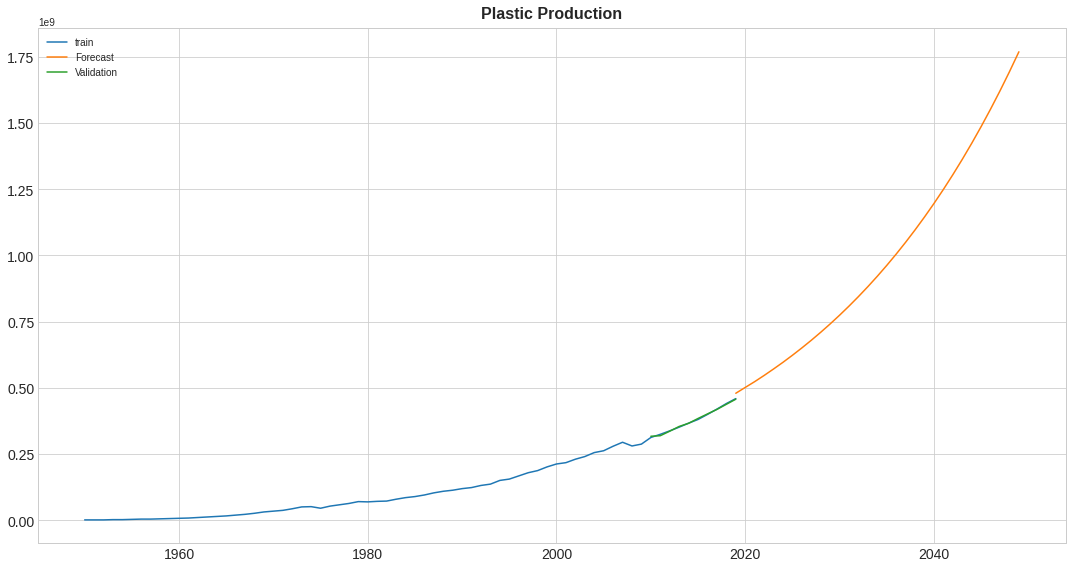

In [145]:
pd.Series(list(timeseries_data+ts_data1) , index = list(year_new)).plot(figsize=(15,8), title= 'Plastic Production', fontsize=14, label='train') 
pd.Series(lst_output , index = list(year_pred)).plot(figsize=(15,8), title= 'Plastic Production', fontsize=14, label='Forecast') 
pd.Series(lst_output2 , index =list(year_valid)).plot(figsize=(15,8), title= 'Plastic Production', fontsize=14, label='Validation') 
plt.legend()

In [148]:
mape(np.array(ts_data1) , np.array(lst_output2))

0.007217741951747204

In [149]:
out_data = list(timeseries_data+ts_data1)

In [150]:
lst_output

[479889380.0,
 501840600.0,
 523704320.0,
 547044500.0,
 571461200.0,
 596702460.0,
 623270300.0,
 650957500.0,
 679834750.0,
 710055700.0,
 741583900.0,
 774515200.0,
 808922400.0,
 844844900.0,
 882368060.0,
 921558900.0,
 962487230.0,
 1005235460.0,
 1049881700.0,
 1096510500.0,
 1145210900.0,
 1196073900.0,
 1249195900.0,
 1304677400.0,
 1362622800.0,
 1423142000.0,
 1486348900.0,
 1552363100.0,
 1621309300.0,
 1693317800.0,
 1768524200.0]

In [151]:
lst_output2 = pd.DataFrame(lst_output2 , columns = ['Validation'])
out_data = pd.DataFrame(out_data , columns = ['Train'])
lst_output  = pd.DataFrame(lst_output  , columns = ['Forecast'])

In [152]:
#from google.colab import drive
#drive.mount('drive')

#lst_output2.to_csv('/content/drive/My Drive/Validation.csv', encoding='utf-8', index=False)
#out_data.to_csv('/content/drive/My Drive/Train.csv', encoding='utf-8', index=False)
#lst_output.to_csv('/content/drive/My Drive/Forecast.csv', encoding='utf-8', index=False)